# Mapping the Public Conversations on Education Using Topic Modelling: Organisational Salience and Attention, 2023–2025

In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import entropy

sns.set_style("whitegrid")

In [17]:
df = pd.read_csv("/workspaces/AM1_topic_modelling/data/full_retro/retro_topics_analysis_ready.csv")

In [18]:
df.head()

,url,date,year,month,source,type,text_clean,topic_num,topic_name,dominant_topic_weight,...,mental_health_and_child_wellbeing,parents_complaints_and_legal_issues,teacher_recruitment_training_and_retention,report_cards_and_accountability_reform,curriculum_and_subject_quality,attendance_hubs_and_behaviour_support,disadvantage_and_attainment_gaps,free_school_meals_and_food_support,school_places_and_capacity,exclusions_and_alternative_provision
0,https://epi.org.uk/publications-and-research/w...,2025-12-11,2025,12,epi,think_tank,early education and care and the private secto...,0,child_and_family_support,0.029188,...,0.00000,0.023686,0.007512,0.000079,0.0,0.000000,0.014102,0.002116,0.012337,0.004506
1,https://epi.org.uk/publications-and-research/e...,2025-12-04,2025,12,epi,think_tank,edtech decision making and inclusive practice ...,18,ai_and_edtech,0.113306,...,0.00307,0.000000,0.012510,0.030622,0.0,0.011429,0.019019,0.000000,0.000000,0.000000
2,https://epi.org.uk/publications-and-research/w...,2025-11-20,2025,11,epi,think_tank,what you learn and what you earn educational c...,19,post_16_education,0.163536,...,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.048886,0.000000,0.000000,0.000000
3,https://epi.org.uk/publications-and-research/a...,2025-11-12,2025,11,epi,think_tank,a decade of degree apprenticeships ten years o...,10,apprenticeships,0.171321,...,0.00201,0.000000,0.000375,0.000849,0.0,0.000000,0.017427,0.001038,0.000000,0.000000
4,https://epi.org.uk/publications-and-research/y...,2025-11-12,2025,11,epi,think_tank,youth degree apprenticeships an alternative to...,10,apprenticeships,0.139310,...,0.00000,0.000000,0.002166,0.000385,0.0,0.000000,0.005540,0.000000,0.000000,0.002097


In [19]:
df.columns

Index(['url', 'date', 'year', 'month', 'source', 'type', 'text_clean',
       'topic_num', 'topic_name', 'dominant_topic_weight',
       'children_wellbeing_and_schooling', 'academy_finance_and_assurance',
       'mat_governance_and_trust_leadership', 'teacher_pay_and_conditions',
       'ofsted_inspection_and_accountability',
       'gcse_results_and_subject_attainment',
       'attendance_and_persistent_absence',
       'dfe_intervention_and_warning_notices',
       'send_system_and_local_authority_deficits',
       'unions_and_industrial_action', 'apprenticeships_and_skills_pathways',
       'exam_regulation_and_awarding_bodies', 'school_buildings_and_raac',
       'key_stage_assessment_and_testing',
       'school_funding_and_public_spending',
       'education_politics_and_legislation',
       'education_research_and_foundations',
       'senior_leadership_and_governance_roles', 'ai_and_edtech_in_classrooms',
       'post_16_and_further_education', 'mental_health_and_child_wellbei

In [20]:
TOPIC_COLS = [
    'children_wellbeing_and_schooling',
     'academy_finance_and_assurance', 'mat_governance_and_trust_leadership',
       'teacher_pay_and_conditions', 'ofsted_inspection_and_accountability',
       'gcse_results_and_subject_attainment',
       'attendance_and_persistent_absence',
       'dfe_intervention_and_warning_notices',
       'send_system_and_local_authority_deficits',
       'unions_and_industrial_action', 'apprenticeships_and_skills_pathways',
       'exam_regulation_and_awarding_bodies', 'school_buildings_and_raac',
       'key_stage_assessment_and_testing',
       'school_funding_and_public_spending',
       'education_politics_and_legislation',
       'education_research_and_foundations',
       'senior_leadership_and_governance_roles', 'ai_and_edtech_in_classrooms',
       'post_16_and_further_education', 'mental_health_and_child_wellbeing',
       'parents_complaints_and_legal_issues',
       'teacher_recruitment_training_and_retention',
       'report_cards_and_accountability_reform',
       'curriculum_and_subject_quality',
       'attendance_hubs_and_behaviour_support',
       'disadvantage_and_attainment_gaps',
       'free_school_meals_and_food_support', 'school_places_and_capacity',
       'exclusions_and_alternative_provision'
]

# Check missing values 

In [21]:
df.isna().sum()

url                                           0
date                                          0
year                                          0
month                                         0
source                                        0
type                                          0
text_clean                                    0
topic_num                                     0
topic_name                                    0
dominant_topic_weight                         0
children_wellbeing_and_schooling              0
academy_finance_and_assurance                 0
mat_governance_and_trust_leadership           0
teacher_pay_and_conditions                    0
ofsted_inspection_and_accountability          0
gcse_results_and_subject_attainment           0
attendance_and_persistent_absence             0
dfe_intervention_and_warning_notices          0
send_system_and_local_authority_deficits      0
unions_and_industrial_action                  0
apprenticeships_and_skills_pathways     

# Create a datetime columns - year_month 

In [22]:
df['year_month'] = pd.to_datetime(
    df['year'].astype(str) + '-' + df['month'].astype(str) + '-01'
)

In [23]:
monthly_avg = (
    df.groupby('year_month')[TOPIC_COLS]
      .mean()
)

# topic distribution

In [24]:
topic_dist = (
    df['topic_name']
    .value_counts(normalize=True)
    .reset_index()
    .rename(columns={'index': 'topic', 'topic_name': 'share'})
)

topic_dist

,share,proportion
0,ofsted_inspections,0.075277
1,mat_governance,0.070745
2,examinations_and_assessment,0.067221
3,teacher_pay,0.064199
4,safeguarding,0.057654
5,education_politics,0.047835
6,post_16_education,0.046073
7,accountability_reform,0.046073
8,send_provision,0.044562
9,ai_and_edtech,0.043051


/tmp/ipykernel_9004/3080150129.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


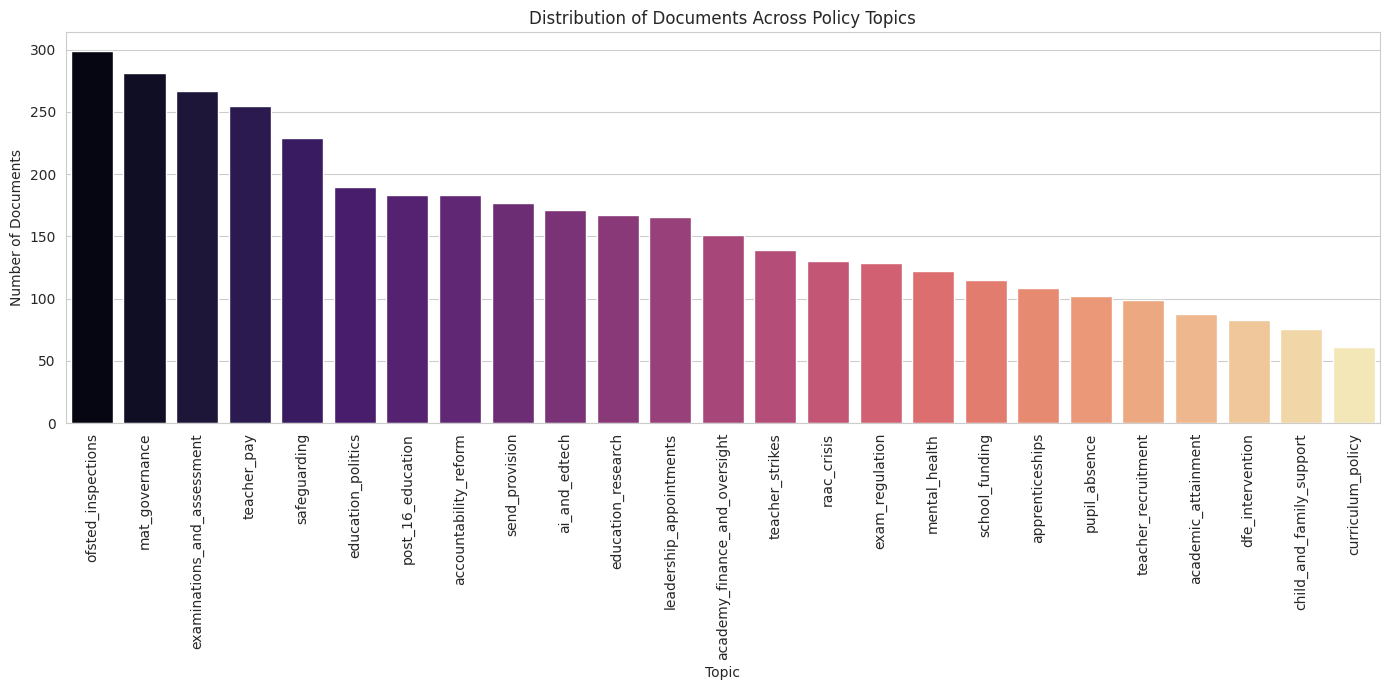

In [25]:
# Topic Distribution across corpus 
# Get topic order by frequency (descending)
topic_order = (
    df['topic_name']
    .value_counts()
    .index
)

plt.figure(figsize=(14, 7))
sns.countplot(
    x='topic_name',
    data=df,
    order=topic_order,
    palette='magma'
)

plt.xlabel("Topic")
plt.ylabel("Number of Documents")
plt.title("Distribution of Documents Across Policy Topics")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

/tmp/ipykernel_9004/3788329959.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


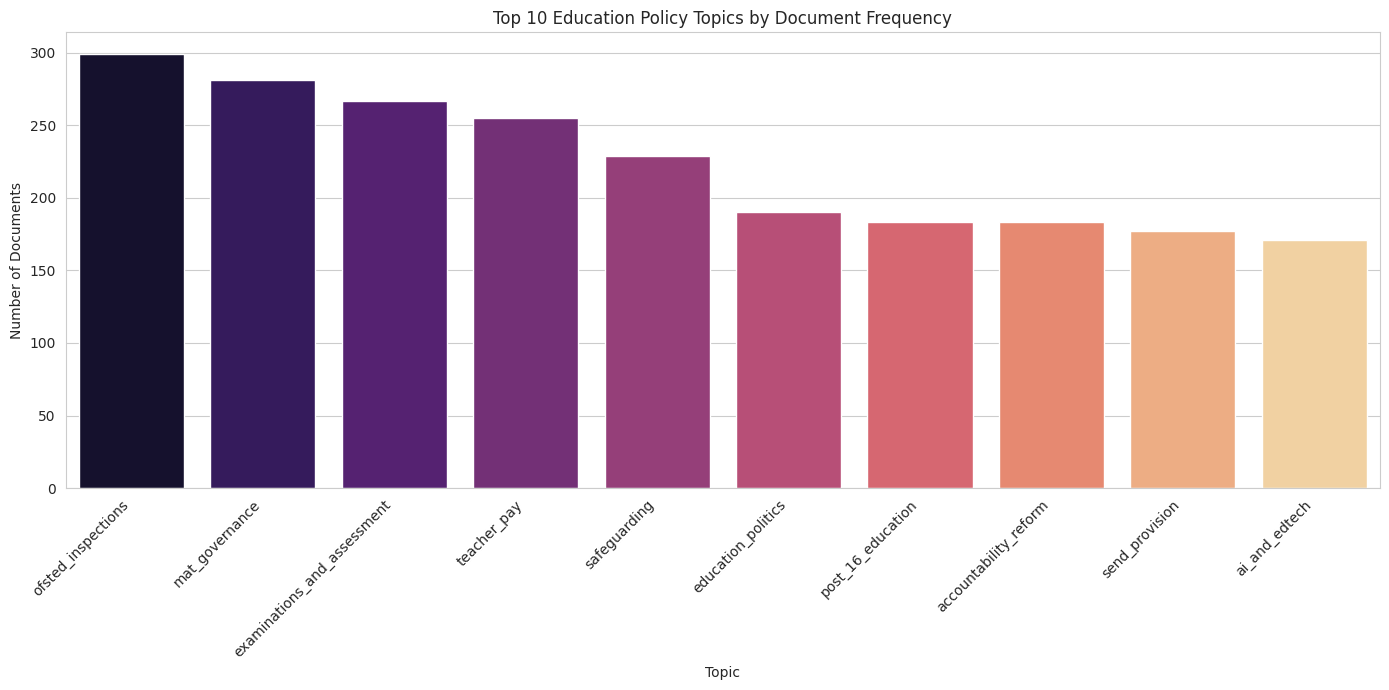

In [26]:
# Get top 10 topics by frequency
top_10_topics = (
    df['topic_name']
    .value_counts()
    .head(10)
    .index
)

plt.figure(figsize=(14, 7))
sns.countplot(
    x='topic_name',
    data=df,
    order=top_10_topics,
    palette='magma'
)

plt.xlabel("Topic")
plt.ylabel("Number of Documents")
plt.title("Top 10 Education Policy Topics by Document Frequency")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# topics per month

In [29]:
topics_over_time_month = (
    df.groupby('year_month')[TOPIC_COLS]
      .mean()
)

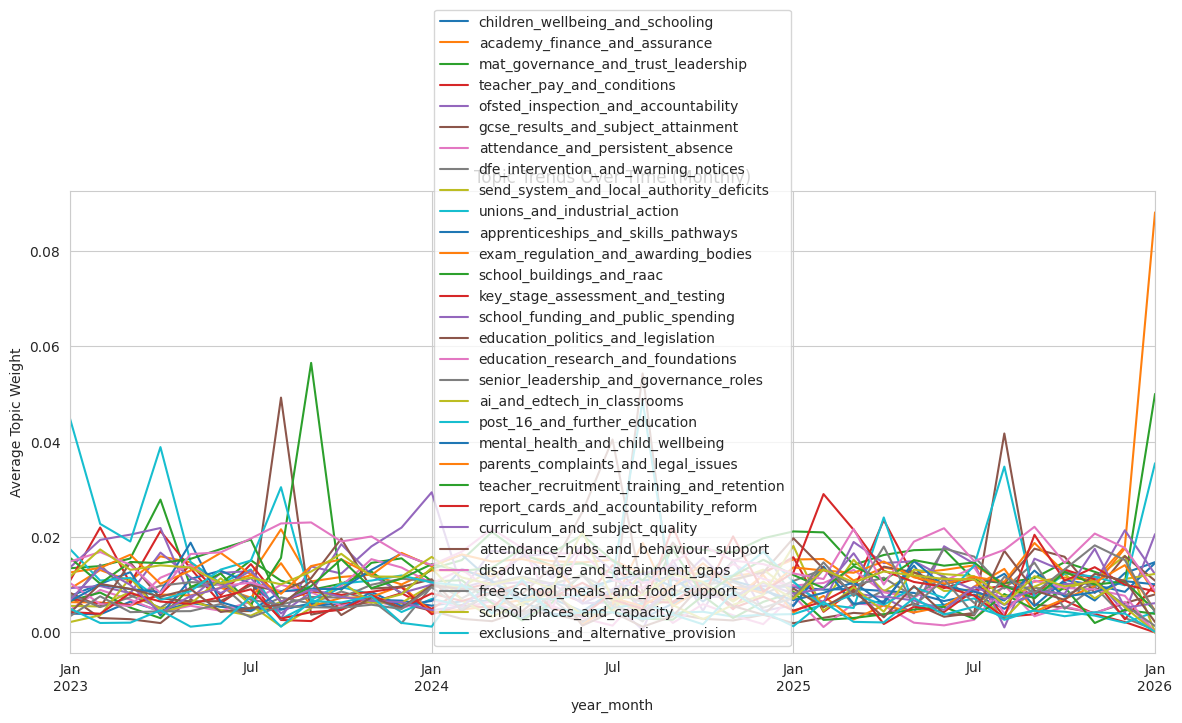

In [30]:
topics_over_time_month.plot(figsize=(14,6))
plt.title("Topic Trends Over Time (Monthly)")
plt.ylabel("Average Topic Weight")
plt.show()

In [33]:
topic_monthly = (
    df[df['topic_name'].isin(top_10_topics)]
    .groupby(['year_month', 'topic_name'])
    .size()
    .reset_index(name='doc_count')
)

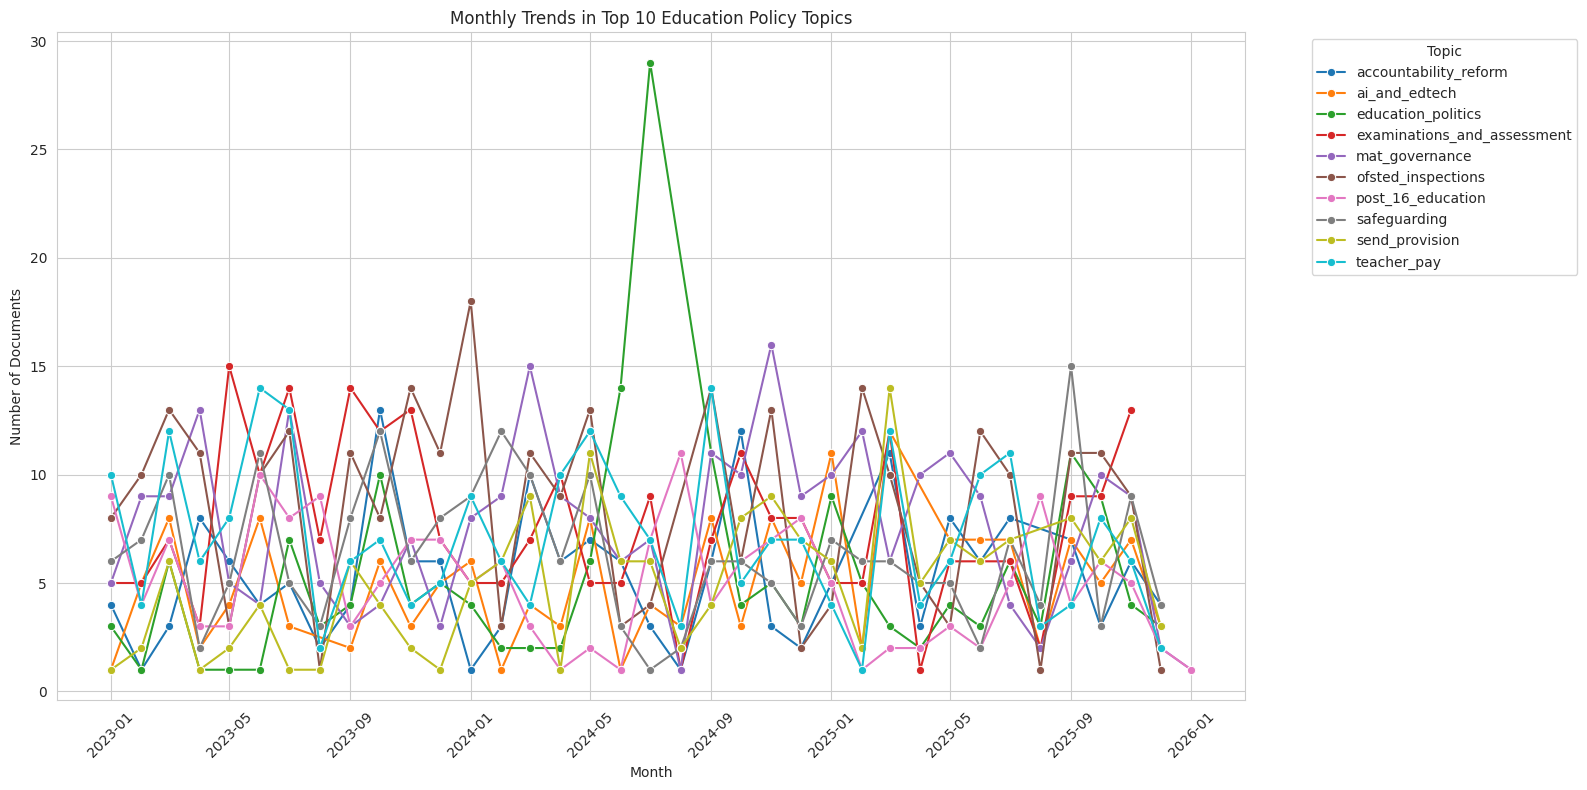

In [34]:
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=topic_monthly,
    x='year_month',
    y='doc_count',
    hue='topic_name',
    marker='o'
)

plt.title("Monthly Trends in Top 10 Education Policy Topics")
plt.xlabel("Month")
plt.ylabel("Number of Documents")
plt.xticks(rotation=45)
plt.legend(title="Topic", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [38]:
topics_over_time_month = (
    df
    .groupby('year_month')[top_10_topics]
    .mean()
)

plt.figure(figsize=(14, 6))

topics_over_time_month.plot(
    ax=plt.gca(),
    linewidth=2.5
)

plt.title("Top 10 Topic Trends Over Time (Monthly)")
plt.xlabel("Month")
plt.ylabel("Average Topic Weight")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


KeyError: "Columns not found: 'mat_governance', 'post_16_education', 'teacher_pay', 'safeguarding', 'send_provision', 'examinations_and_assessment', 'accountability_reform', 'education_politics', 'ai_and_edtech', 'ofsted_inspections'"

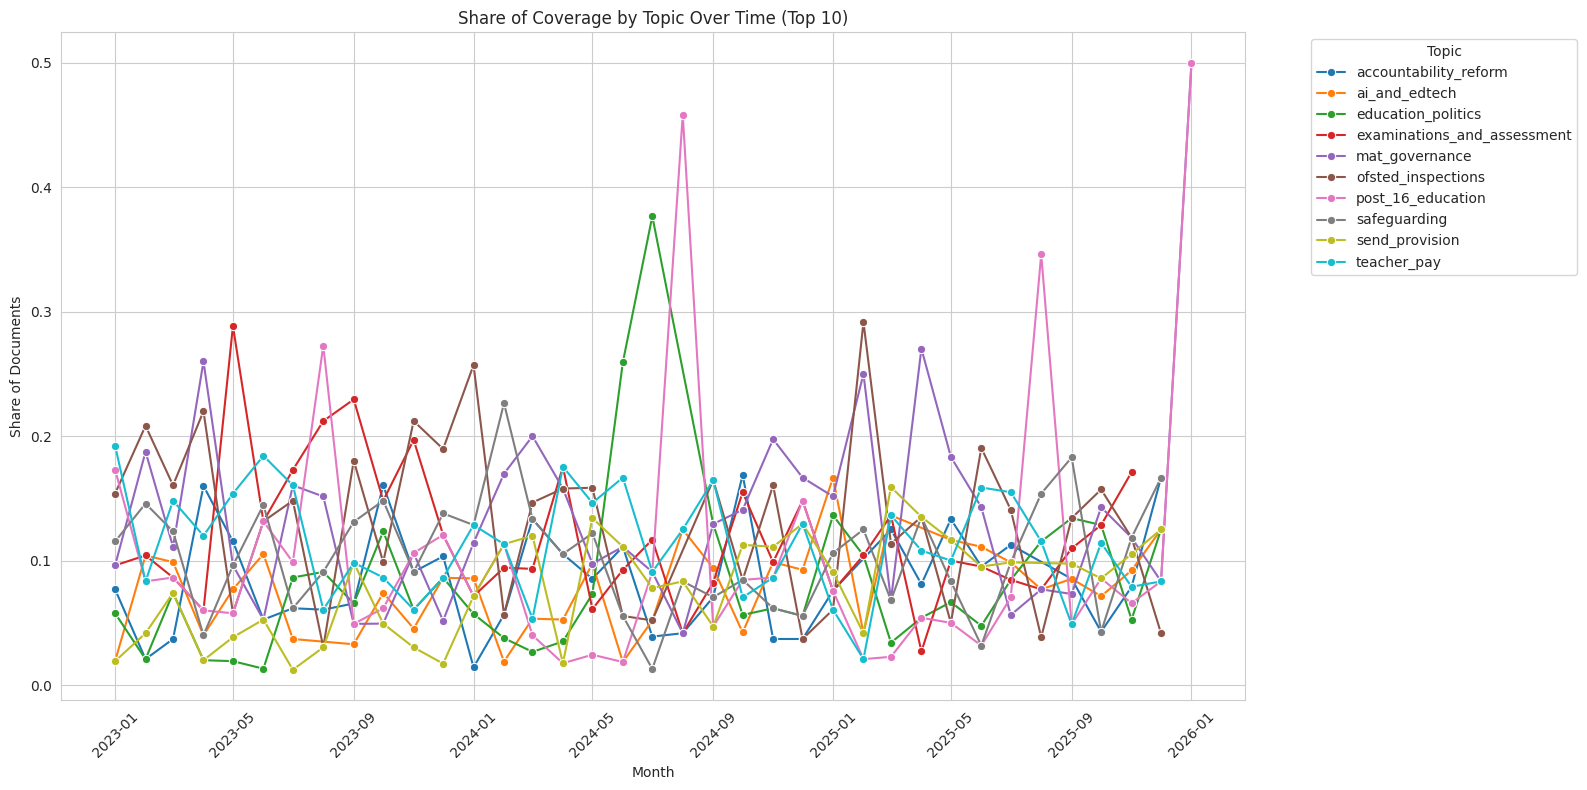

In [36]:
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=topic_monthly_norm,
    x='year_month',
    y='share',
    hue='topic_name',
    marker='o'
)

plt.title("Share of Coverage by Topic Over Time (Top 10)")
plt.xlabel("Month")
plt.ylabel("Share of Documents")
plt.xticks(rotation=45)
plt.legend(title="Topic", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()